This is the Safe_home project. I try to build a model to predict fire hazard.
thats interesting!


source of Data: https://www.mdpi.com/2571-6255/5/1/11:

In [ ]:
!pip install -q ptitprince
!pip install tensorflow-addons
!pip install netron 
!pip3 install keras-visualizer
!pip3 install keras-visualizer --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 KB 16.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , f1_score, recall_score
from sklearn.covariance import EllipticEnvelope

import tensorflow as tf 
import tensorflow_addons as tfAddons
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Dropout , Input
from tensorflow.keras.metrics import AUC , Recall

from IPython.display import Image
import ptitprince as pt 
from keras_visualizer import visualizer

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive 
drive.mount('/content/drive')
carton_1 = pd.read_csv('/content/drive/Other computers/MyLaptop/FlyDrive/python/Indoor Laboratory Fire Dataset/carton_1.csv',index_col=0)
carton_2 = pd.read_csv('/content/drive/Other computers/MyLaptop/FlyDrive/python/Indoor Laboratory Fire Dataset/carton_2.csv',index_col=0)
clothing_1 = pd.read_csv('/content/drive/Other computers/MyLaptop/FlyDrive/python/Indoor Laboratory Fire Dataset/clothing_1.csv',index_col=0)
clothing_2 = pd.read_csv('/content/drive/Other computers/MyLaptop/FlyDrive/python/Indoor Laboratory Fire Dataset/clothing_2.csv',index_col=0)
electrical_1 = pd.read_csv('/content/drive/Other computers/MyLaptop/FlyDrive/python/Indoor Laboratory Fire Dataset/electrical_1.csv',index_col=0)
electrical_2 = pd.read_csv('/content/drive/Other computers/MyLaptop/FlyDrive/python/Indoor Laboratory Fire Dataset/electrical_2.csv',index_col=0)
electrical_3 = pd.read_csv('/content/drive/Other computers/MyLaptop/FlyDrive/python/Indoor Laboratory Fire Dataset/electrical_3.csv',index_col=0)
electrical_4 = pd.read_csv('/content/drive/Other computers/MyLaptop/FlyDrive/python/Indoor Laboratory Fire Dataset/electrical_4.csv',index_col=0)

# source: https://www.mdpi.com/2571-6255/5/1/11

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Columns description:**

Time: Time (in 24-h format) when data was recorded by the sensor.

Reading ID#: unique id for the row or instances

Humidity%: humidity percentage

Temperature: temperature record in Celsius (°C)

MQ139: VOC gases (most sensitive to the Ammonia 
(NH3) and Freon gases level

TVOC: TVOC (Total Volatile Organic Compounds) level

eCO2: the estimated concentration of carbon 
dioxide calculated from known TVOC concentration. This assumes that the VOC produced by humans is proportional to their exhaled CO2. The analog output of the VOC sensor is in the range of 400–2000 ppm eCO2.

Detector: the fire alarm detection (conventional Photoelectric smoke detector). ‘OFF’ indicates no fire detected, while ‘OFF’ indicates a fire is detected

Status: ‘0′ represents the initial point of the experiment (i.e., no fire or activated alarm). ‘1′ represents the point at which the fire has been started but with no activated alarm yet (i.e., by electrical devices or charcoal). ‘2′ represents the point at which the real fire system was activated by the fire cause.
So 1 is like False-Negetive and 2 is like True-positive and we can calculate system Recall.

**I evaluate all datasets one by one:** 


In [ ]:
def recall(FN , TP):
    return TP/(TP+FN)

def set_values(name):
    uniqe_values = name['Status'].value_counts()
    print(name.shape,'\n',uniqe_values,'\n' , pd.concat( [name.mean().to_frame().T , name.var().to_frame().T] , ignore_index= True).drop(['Reading ID', 'Status'] , axis=1) ,'\n >>>Recall:', recall(uniqe_values[1],uniqe_values[2]) , '\n--------------------------------------')

datasets_name = [carton_1,carton_2,clothing_1,clothing_2,electrical_1,electrical_2,electrical_3,electrical_4,]
after_process = []
for i in datasets_name:
    i = i.set_axis(['Reading ID', 'Humidity', 'Temperature', 'MQ139', 'TVOC', 'eCO2','Detector', 'Status'], axis=1, inplace=False)
    after_process.append( i )
    set_values( i )



(330, 8) 
 1    180
2     99
0     51
Name: Status, dtype: int64 
     Humidity  Temperature        MQ139          TVOC          eCO2
0  44.341212    21.377879   140.800000  1.511300e+03  2.986785e+03
1   0.312886     0.009874  1147.431003  2.074491e+06  6.246024e+06 
 >>>Recall: 0.3548387096774194 
--------------------------------------
(456, 8) 
 1    319
0     91
2     46
Name: Status, dtype: int64 
     Humidity  Temperature        MQ139           TVOC          eCO2
0  60.851974    24.552632   254.118421     497.883772  2.400546e+03
1   0.269974     0.064696  4761.621110  302685.680967  5.072517e+06 
 >>>Recall: 0.12602739726027398 
--------------------------------------
(918, 8) 
 2    513
1    392
0     13
Name: Status, dtype: int64 
     Humidity  Temperature        MQ139           TVOC          eCO2
0  42.584641    21.605991   179.149237    1605.180828  5.729742e+03
1   4.739317     0.011513  1452.735610  670700.207178  8.469736e+06 
 >>>Recall: 0.5668508287292817 
------------

**And I concatinate these with eachother to generalize data and modle:**

In [ ]:
'''Dataset overviwe:'''

data = pd.concat( after_process ,ignore_index= True)
uniqe_values = data['Status'].value_counts()
print(data.shape,'\n',uniqe_values,'\n' , pd.concat( [data.mean().to_frame().T , data.var().to_frame().T] , ignore_index= True).drop(['Reading ID', 'Status'] , axis=1) ,'\n >>>Recall:', recall(uniqe_values[1],uniqe_values[2]) , '\n--------------------------------------')
data[ data['Status'] == 2 ] = 1


(11797, 8) 
 1    6665
0    2831
2    2301
Name: Status, dtype: int64 
      Humidity  Temperature        MQ139          TVOC          eCO2
0   56.280037    22.869645   155.331779  2.108972e+03  4.239956e+03
1  102.116172     2.201019  9531.999103  2.855903e+07  7.901478e+07 
 >>>Recall: 0.25663618112870845 
--------------------------------------


In [ ]:
data.head()

,Reading ID,Humidity,Temperature,MQ139,TVOC,eCO2,Detector,Status
0,1,43.5,21.3,98,0,400,OFF,0
1,2,43.5,21.3,97,0,400,OFF,0
2,3,43.6,21.4,97,0,400,OFF,0
3,4,43.6,21.4,97,0,400,OFF,0
4,5,43.7,21.4,98,0,400,OFF,0


In [ ]:
try:
    data = data.drop(['Reading ID', 'Detector'] , axis=1)
except:
    None
print( 'duplicated rows:' , data[data.duplicated()].shape )
data.isna().sum().to_frame().T

duplicated rows: (3417, 6)


,Humidity,Temperature,MQ139,TVOC,eCO2,Status
0,0,0,0,0,0,0


In [ ]:
data.describe()

,Humidity,Temperature,MQ139,TVOC,eCO2,Status
count,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000,11797.000000
mean,45.535712,18.424303,95.324065,269.831567,748.898618,0.760024
std,23.906211,8.666570,64.895176,589.465818,1107.340478,0.427087
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,38.600000,20.700000,74.000000,4.000000,400.000000,1.000000
50%,60.200000,22.000000,92.000000,108.000000,424.000000,1.000000
75%,63.000000,23.800000,117.000000,215.000000,511.000000,1.000000
max,67.100000,24.900000,360.000000,8252.000000,12166.000000,1.000000


In [ ]:
''' Auto convert object to one hot'''
# catcol = [col for col in data.columns if data[col].dtype == "object"]
# le = LabelEncoder()
# for col in catcol:
#         data[col] = le.fit_transform(data[col])

' Auto convert object to one hot'

## **Let's visualize!:**

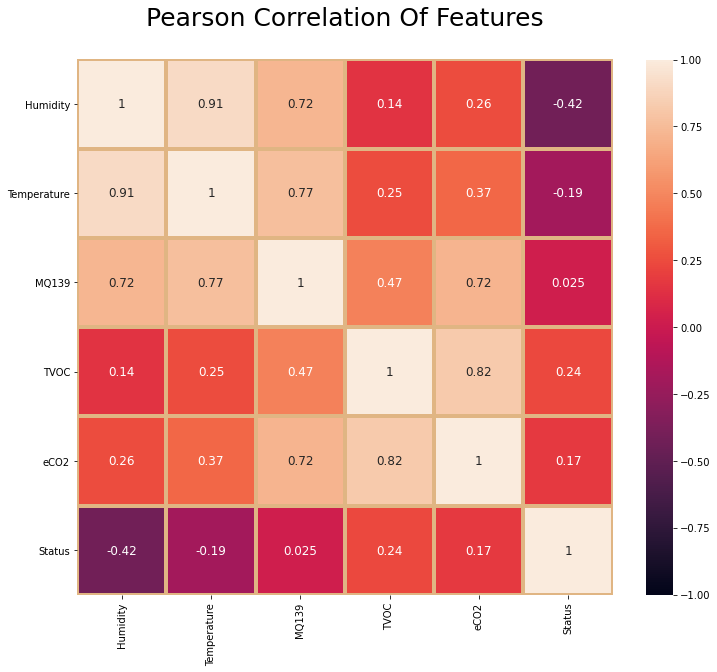

In [ ]:
plt.subplots(figsize =(12, 12))

sns.heatmap(data .corr(),  square=True, cbar_kws=dict(shrink =.82), 
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

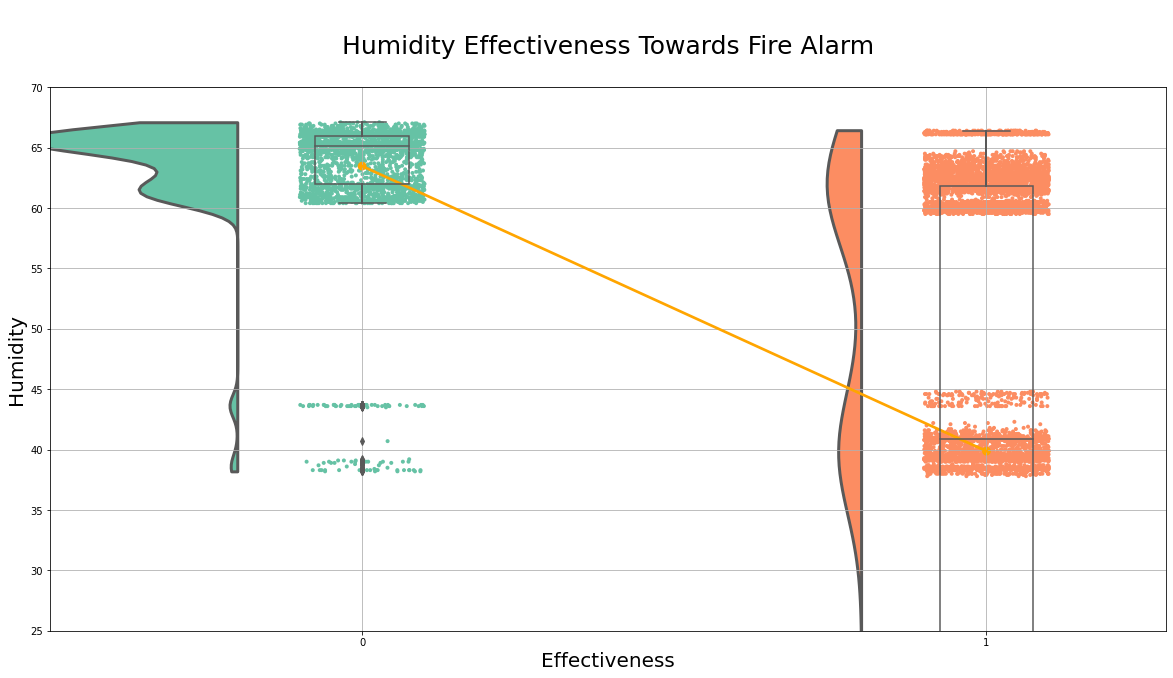

In [ ]:
plt.subplots(figsize=(20, 10))

p=pt.RainCloud(data=data,x=data["Status"],y=data["Humidity"],order=data["Status"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=4,saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nHumidity Effectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Humidity",fontsize=20)
plt.grid()
p.axes.set_ylim(25,70)

plt.show()

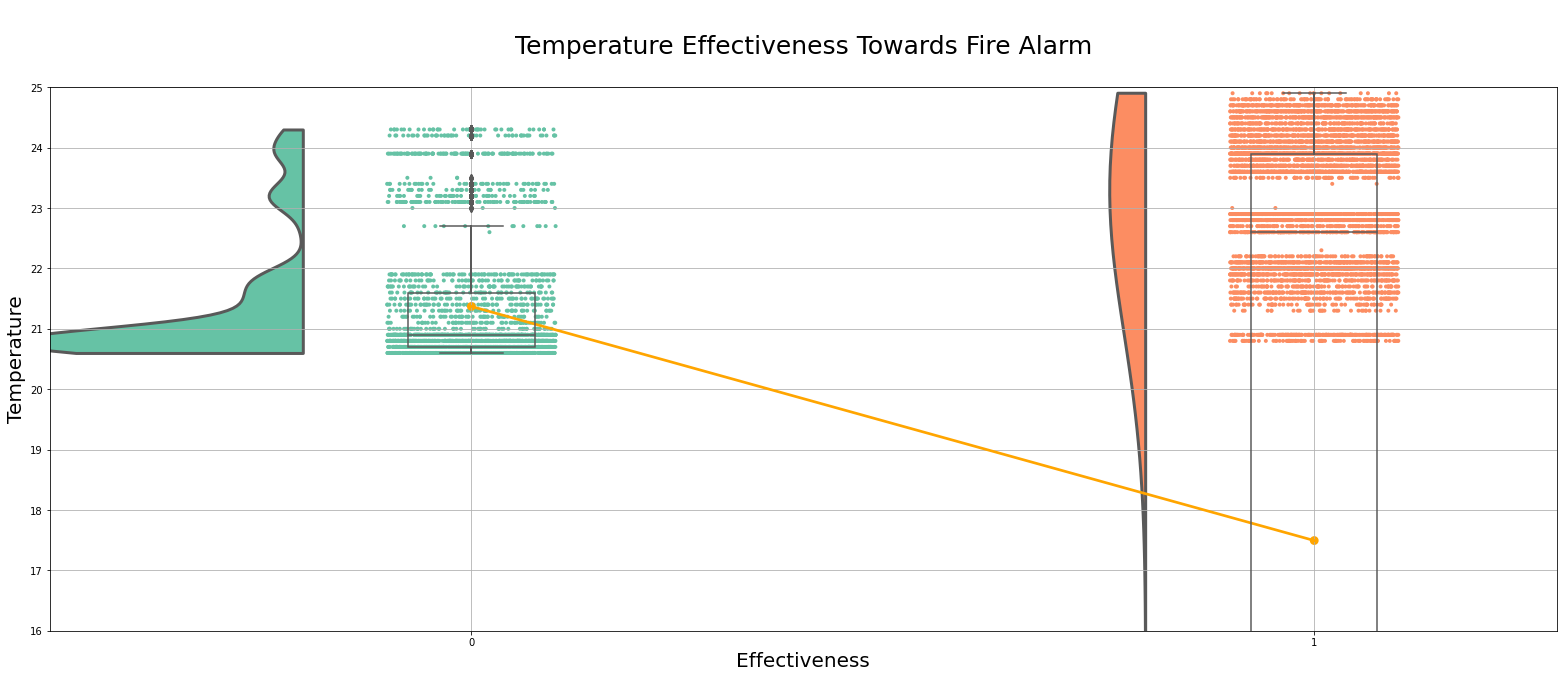

In [ ]:
plt.subplots(figsize=(27, 10))

p=pt.RainCloud(data=data,x=data["Status"],y=data["Temperature"],order=data["Status"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=4,saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nTemperature Effectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("Temperature",fontsize=20)
plt.grid()
p.axes.set_ylim(16,25)

plt.show()

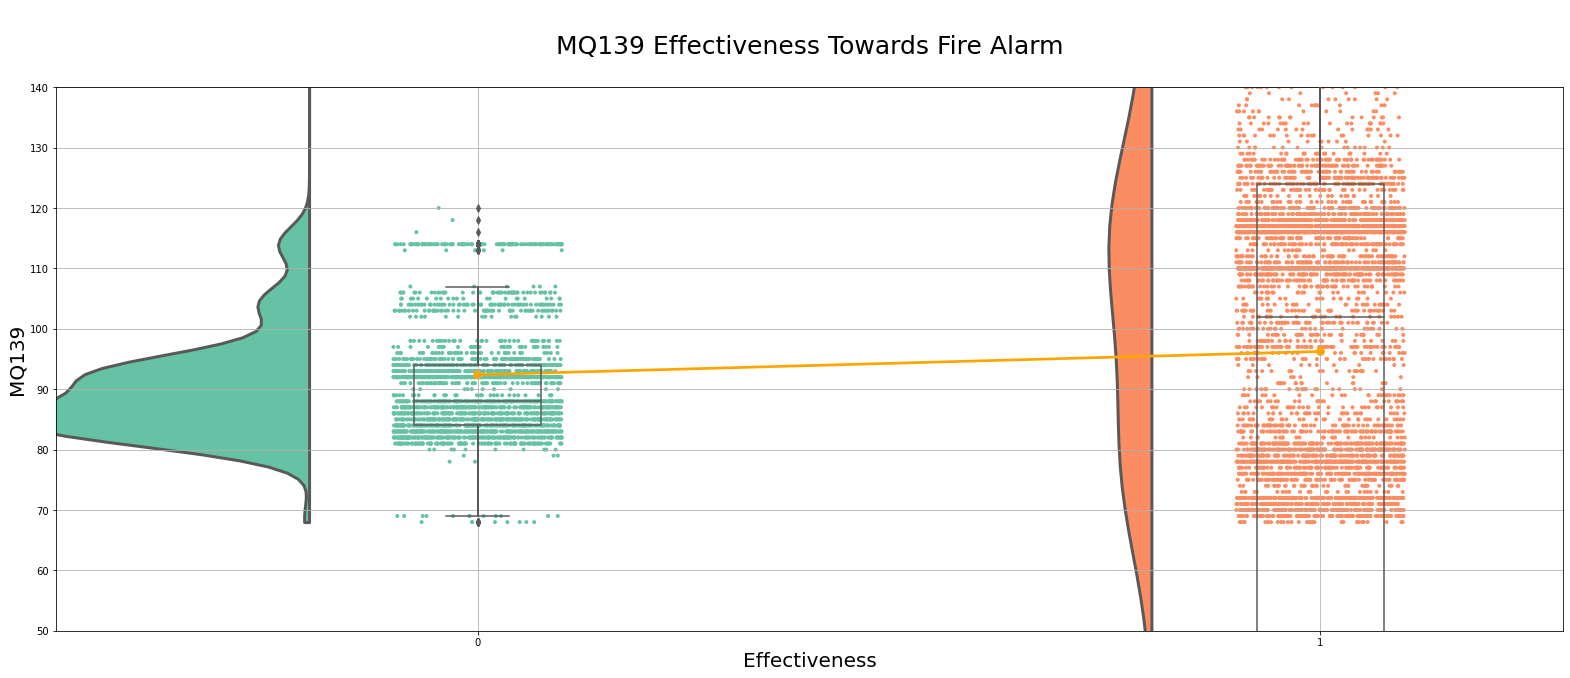

In [ ]:
plt.subplots(figsize=(27, 10))

p=pt.RainCloud(data=data,x=data["Status"],y=data["MQ139"],order=data["Status"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=4,saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\nMQ139 Effectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("MQ139",fontsize=20)
plt.grid()
p.axes.set_ylim(50,140)

plt.show()

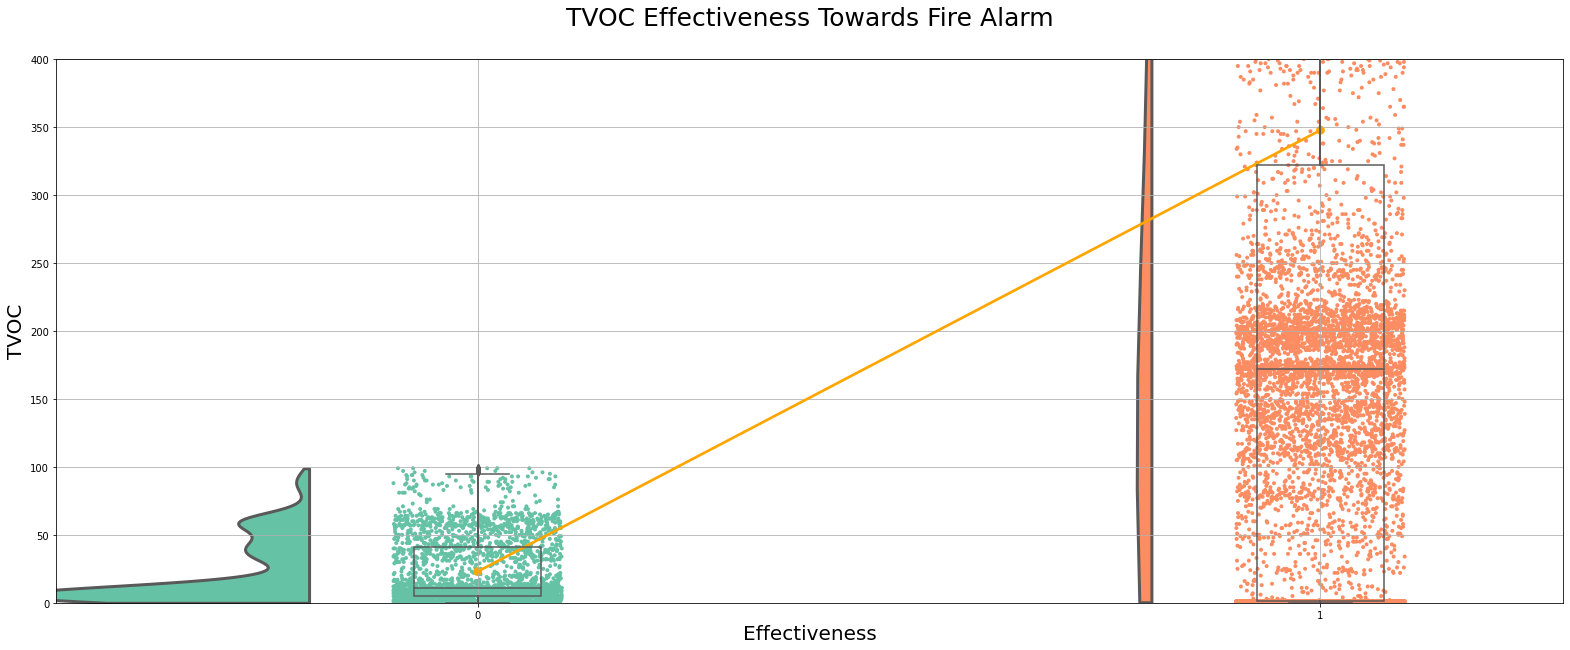

In [ ]:

plt.subplots(figsize=(27, 10))

p=pt.RainCloud(data=data,x=data["Status"],y=data["TVOC"],order=data["Status"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=4,saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("TVOC Effectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("TVOC",fontsize=20)
plt.grid()
p.axes.set_ylim(0,400)

plt.show()

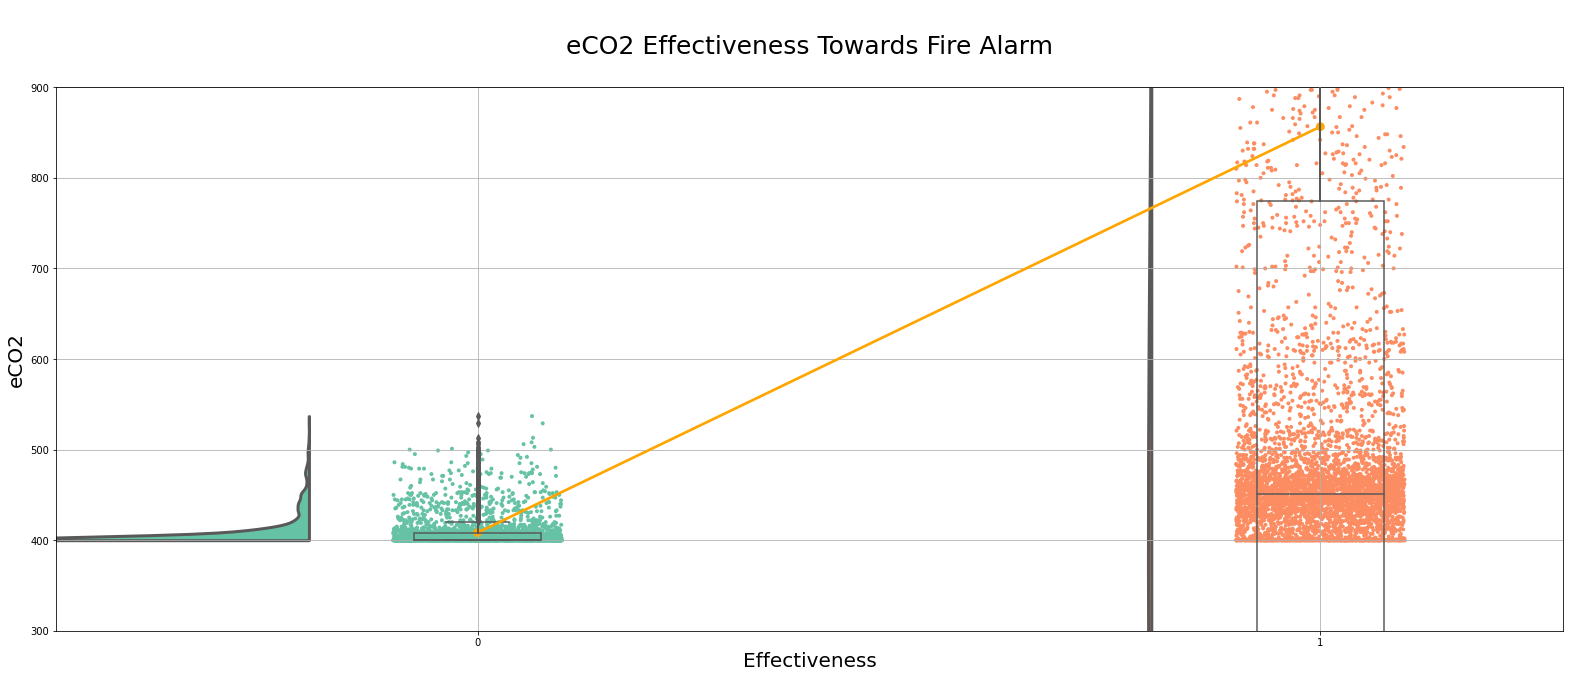

In [ ]:
plt.subplots(figsize=(27, 10))

p=pt.RainCloud(data=data,x=data["Status"],y=data["eCO2"],order=data["Status"].value_counts(ascending=True).index,pointplot=True,linecolor="orange",point_size=4,saturation=1,linewidth=3,edgecolor="black")
p.axes.set_title("\neCO2 Effectiveness Towards Fire Alarm\n",fontsize=25)
p.axes.set_xlabel("Effectiveness",fontsize=20)
p.axes.set_ylabel("eCO2",fontsize=20)
plt.grid()
p.axes.set_ylim(300,900)

plt.show()

**Lets train and test Models:**

# Anomaly
for us 0 is normal and 1 is anormal.

It will return 1 for an inlier and -1 for an outlier.


In [ ]:
dataAn = data

def checker(x):
    if x==1:
        return 0
    elif x==-1:
        return 1
checker_vec = np.vectorize(checker)

dataAn = dataAn.sample(frac=1).reset_index()

normal_anomaly_data_label = dataAn[dataAn['Status'] == 0]['Status'].values
normal_anomaly_data = dataAn[dataAn['Status'] == 0].drop(['Status'], axis=1).values
anormal_anomaly_data_label = dataAn[dataAn['Status'] == 1]['Status'].values
anormal_anomaly_data = dataAn[dataAn['Status'] == 1].drop(['Status'], axis=1).values


train_anomaly_data = normal_anomaly_data[:2000]
cv_anomaly_data = np.concatenate( (normal_anomaly_data[2000:2400] , anormal_anomaly_data[:7000]) , axis=0) 
cv_anomaly_data_label = np.concatenate( (normal_anomaly_data_label[2000:2400] , anormal_anomaly_data_label[:7000]) , axis=0) 

test_anomaly_data = np.concatenate( (normal_anomaly_data[2400:2831] , anormal_anomaly_data[7000:]) , axis=0)
test_anomaly_data_label = np.concatenate( (normal_anomaly_data_label[2400:2831] , anormal_anomaly_data_label[7000:]) , axis=0)

print(normal_anomaly_data.shape,anormal_anomaly_data.shape,train_anomaly_data.shape ,cv_anomaly_data.shape ,test_anomaly_data.shape)


# print( confusion_matrix(cv_anomaly_data_label,pred))
# print( f1_score(cv_anomaly_data_label,pred))


f1_best =0
contam_best =0
for contam in np.arange(0.1,0.5,0.01):
    model_anomal = EllipticEnvelope(contamination= contam )
    model_anomal.fit(train_anomaly_data)    
    pred = model_anomal.predict(cv_anomaly_data)
    pred = checker_vec(pred)

    f1_ano =  f1_score(cv_anomaly_data_label,pred)
    print( confusion_matrix(cv_anomaly_data_label,pred))
    print( f1_ano ,contam)

    if f1_best<f1_ano:
        f1_best = f1_ano
        contam_best = contam

print('-------------------------------------------\n best contamination:' , contam_best)
model_anomal = EllipticEnvelope(contamination= contam_best )
model_anomal.fit(train_anomaly_data)    

pred = model_anomal.predict(test_anomaly_data)
pred = checker_vec(pred)


f1_ano =  f1_score(test_anomaly_data_label,pred)
recall_ano = recall_score(test_anomaly_data_label,pred, average='weighted')
print( confusion_matrix(test_anomaly_data_label,pred))
print( 'f1:' ,f1_ano ,'recall:', recall_ano)

(2831, 6) (8966, 6) (2000, 6) (7400, 6) (2397, 6)
[[ 367   33]
 [2291 4709]]
0.8020780105603816 0.1
[[ 363   37]
 [1826 5174]]
0.8474326426992056 0.11
[[ 361   39]
 [1484 5516]]
0.8786937475109519 0.12
[[ 358   42]
 [1372 5628]]
0.8883977900552485 0.13
[[ 354   46]
 [1103 5897]]
0.9112261454067835 0.13999999999999999
[[ 349   51]
 [1017 5983]]
0.918060457265613 0.14999999999999997
[[ 342   58]
 [ 927 6073]]
0.9249866727591196 0.15999999999999998
[[ 340   60]
 [ 850 6150]]
0.9311127933383799 0.16999999999999998
[[ 339   61]
 [ 800 6200]]
0.9350727697760348 0.17999999999999997
[[ 335   65]
 [ 754 6246]]
0.9384719405003381 0.18999999999999995
[[ 330   70]
 [ 728 6272]]
0.9401888772298007 0.19999999999999996
[[ 325   75]
 [ 662 6338]]
0.9450533064937001 0.20999999999999996
[[ 320   80]
 [ 632 6368]]
0.9470553242117787 0.21999999999999995
[[ 317   83]
 [ 620 6380]]
0.9477828121518237 0.22999999999999995
[[ 312   88]
 [ 578 6422]]
0.9507031828275352 0.23999999999999994
[[ 313   87]
 [ 598 64

In [ ]:
y = data['Status']
x = data.drop(['Status'] , axis=1)

x = StandardScaler().fit_transform(x)
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=1899)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((9437, 5), (2360, 5), (9437,), (2360,))

In [ ]:
logis = LogisticRegression()
logis.fit(x_train , y_train)
pred_logis = logis.predict(x_test)

print( confusion_matrix(y_test, pred_logis))
print( classification_report(y_test,pred_logis))

[[ 544   29]
 [  15 1772]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       573
           1       0.98      0.99      0.99      1787

    accuracy                           0.98      2360
   macro avg       0.98      0.97      0.97      2360
weighted avg       0.98      0.98      0.98      2360



## **Support vector machine:**
0.0001 < gamma < 10 :Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

0.1 < c < 100 :For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.

In [ ]:
svm = SVC( C=10 , gamma = 1)
svm.fit(x_train,y_train)
pred_svm = svm.predict(x_test)
print(confusion_matrix(y_test,pred_svm))
print(classification_report(y_test,pred_svm))

[[ 555   18]
 [   2 1785]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       573
           1       0.99      1.00      0.99      1787

    accuracy                           0.99      2360
   macro avg       0.99      0.98      0.99      2360
weighted avg       0.99      0.99      0.99      2360



# Random forest:

[[ 570    3]
 [   0 1787]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       573
           1       1.00      1.00      1.00      1787

    accuracy                           1.00      2360
   macro avg       1.00      1.00      1.00      2360
weighted avg       1.00      1.00      1.00      2360



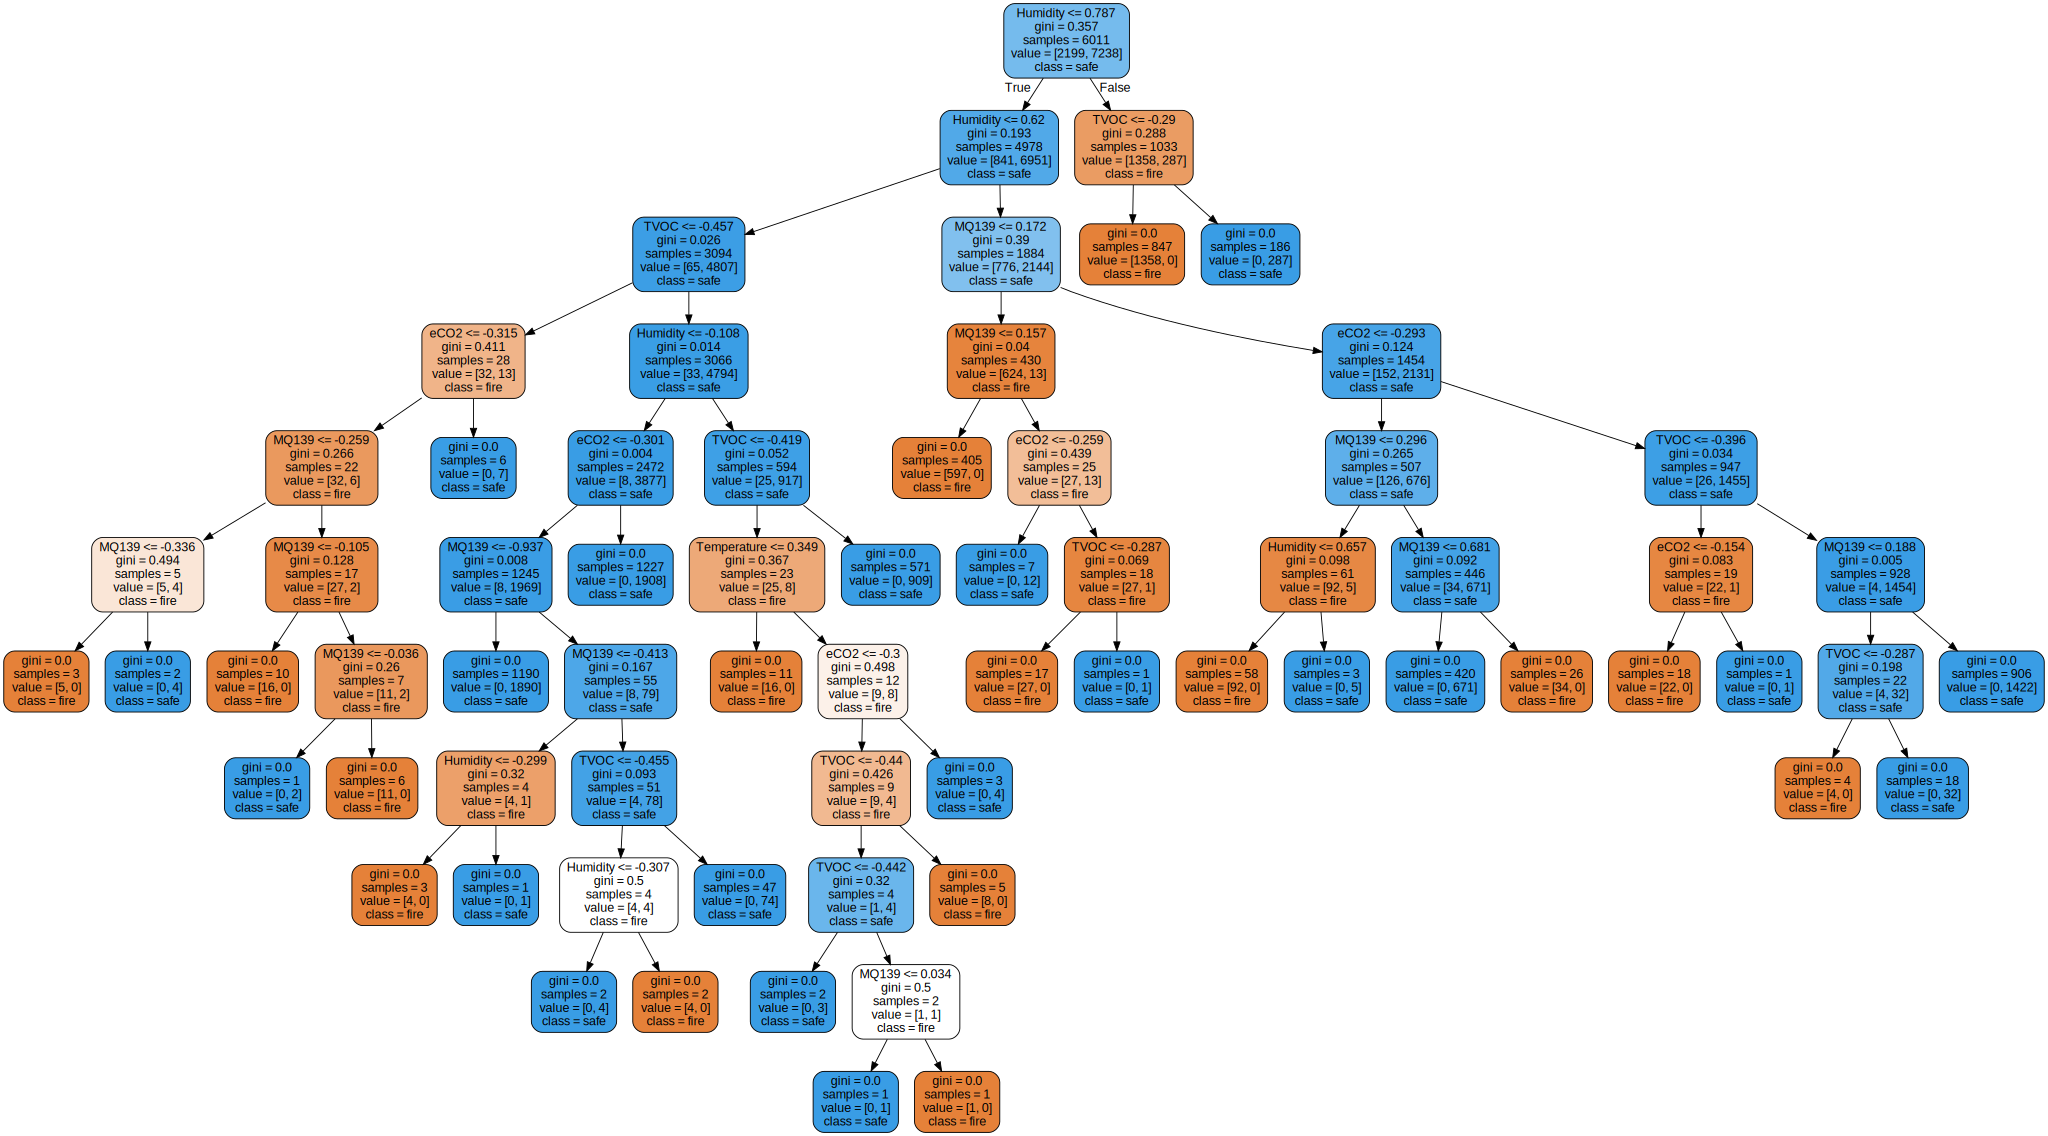

In [ ]:
forest = RandomForestClassifier( n_estimators=200 , random_state = 1899)
forest.fit(x_train , y_train)
pred_forest = forest.predict(x_test)
print(confusion_matrix(y_test,pred_forest))
print(classification_report(y_test,pred_forest))

forest_out = export_graphviz( forest.estimators_[0] , feature_names= list((data.columns)[:-1]) , class_names= ['fire','safe'] , filled = True , rounded=True )
forest_file = graphviz.Source(forest_out, format= 'png')
forest_file.render()
forest_file

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

[[ 569    4]
 [   0 1787]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       573
           1       1.00      1.00      1.00      1787

    accuracy                           1.00      2360
   macro avg       1.00      1.00      1.00      2360
weighted avg       1.00      1.00      1.00      2360



# Finally neural network!

In [ ]:
regularize_parameter = 0.01
network = Sequential ( [Input (shape =  x_train.shape[-1] )
                        ,Dense(16 , activation= 'relu' , kernel_regularizer = regularizers.l1(regularize_parameter) , name = 'L1' )
                        ,BatchNormalization()
                        ,Dense(64 , activation = 'relu' , kernel_regularizer = regularizers.l1(regularize_parameter) , name = 'L2')
                        ,BatchNormalization()
                        ,Dense(128, activation= 'relu' , kernel_regularizer = regularizers.l1(regularize_parameter) , name = 'L3')
                        ,Dropout(0.5)
                        ,BatchNormalization()
                        ,Dense(16, activation= 'relu' , kernel_regularizer = regularizers.l1(regularize_parameter) , name = 'L4')
                        ,Dense(1 , activation= 'sigmoid' , name = 'L5')
                    ] )
network.save('net.h5')
network.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 16)                96        
                                                                 
 batch_normalization_24 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 L2 (Dense)                  (None, 64)                1088      
                                                                 
 batch_normalization_25 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 L3 (Dense)                  (None, 128)               8320      
                                                                 
 dropout_8 (Dropout)         (None, 128)              

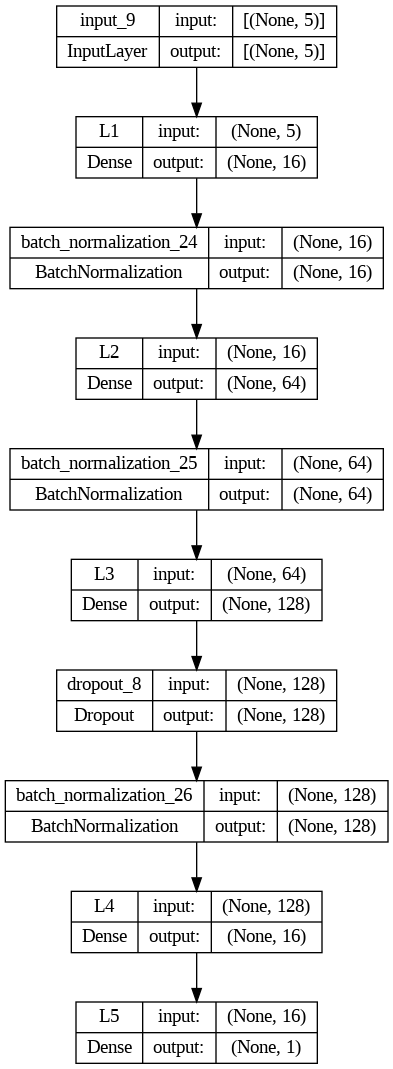

In [ ]:
tf.keras.utils.plot_model(network, show_shapes=True)

In [ ]:
# import netron
# netron.start('net.h5') ### doest workkkkkkkkkkkkkkkkkkk

In [ ]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


class myCallback( tf.keras.callbacks.Callback):
    def on_epoch_end( self, epoch, logs={} ):
        if (logs.get('accuracy') == 1.0 ):
            self.model.stop_training = True

callback_obj = myCallback()

# Early = tf.keras.callbacks.EarlyStopping( monitor='accuracy', mode='max', min_delta=0.001, patience=3, verbose = 1)
Early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', verbose=1 ,mode='max',patience=50)

network.compile( optimizer= Adam(0.0005) ,
                loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics = [ 'accuracy', f1, AUC(from_logits=True,curve='ROC') , Recall() ] 
                )

# visualizer(network, filename='network', format='png', view=True)
# Image('network.png')

In [ ]:
history = network.fit( x_train,y_train,
            epochs = 150,
            verbose = 1,
            batch_size=256,
            validation_data = (x_test,y_test),
            callbacks = [Early , callback_obj] )

Epoch 1/150
37/37 [==============================] - 3s 24ms/step - loss: 10.6770 - accuracy: 0.7081 - f1: 0.7551 - auc_10: 0.9421 - recall_8: 0.6314 - val_loss: 9.9205 - val_accuracy: 0.7572 - val_f1: 0.8611 - val_auc_10: 0.9759 - val_recall_8: 1.0000
Epoch 2/150
37/37 [==============================] - 0s 7ms/step - loss: 8.8264 - accuracy: 0.9295 - f1: 0.9517 - auc_10: 0.9785 - recall_8: 0.9193 - val_loss: 8.2673 - val_accuracy: 0.7572 - val_f1: 0.8611 - val_auc_10: 0.9679 - val_recall_8: 1.0000
Epoch 3/150
37/37 [==============================] - 0s 8ms/step - loss: 7.1926 - accuracy: 0.9697 - f1: 0.9799 - auc_10: 0.9875 - recall_8: 0.9733 - val_loss: 6.7735 - val_accuracy: 0.7572 - val_f1: 0.8611 - val_auc_10: 0.9653 - val_recall_8: 1.0000
Epoch 4/150
37/37 [==============================] - 0s 9ms/step - loss: 5.7411 - accuracy: 0.9790 - f1: 0.9862 - auc_10: 0.9958 - recall_8: 0.9845 - val_loss: 5.4665 - val_accuracy: 0.7572 - val_f1: 0.8611 - val_auc_10: 0.9431 - val_recall_8: 1

In [ ]:
network.get_layer('L4').get_weights()

[array([[-7.19876771e-05, -5.29529825e-06,  1.80018978e-05, ...,
          6.78166398e-05, -1.48366853e-05, -8.98263388e-05],
        [-9.60708203e-05, -4.32479646e-05,  5.96198952e-05, ...,
         -9.16104036e-05,  8.61291046e-05, -1.41867757e-04],
        [-2.08848105e-05, -2.84011148e-05,  6.39520731e-05, ...,
         -4.89206031e-05,  2.78560583e-05,  3.85583407e-05],
        ...,
        [ 1.20399345e-04, -4.33177593e-05,  7.03335099e-05, ...,
          1.35472394e-04, -1.06434731e-04, -3.09882162e-05],
        [ 6.31088187e-05, -9.23143598e-05, -1.31417837e-05, ...,
          1.52553592e-04, -6.53193056e-05, -8.86394555e-05],
        [-7.44738281e-05,  1.37821655e-04,  2.27778710e-05, ...,
         -3.49018010e-05,  1.48391555e-04,  3.60152808e-05]], dtype=float32),
 array([-4.7597446e-02,  4.7606096e-01, -3.2952637e-04,  2.0450091e-01,
        -7.1951061e-02, -6.2070868e-04,  3.7226063e-01,  3.8664997e-01,
         7.0173234e-01,  6.6935843e-01,  8.5014176e-01, -5.9241027e-02

Let's have a look on the performance of neural network architecture :


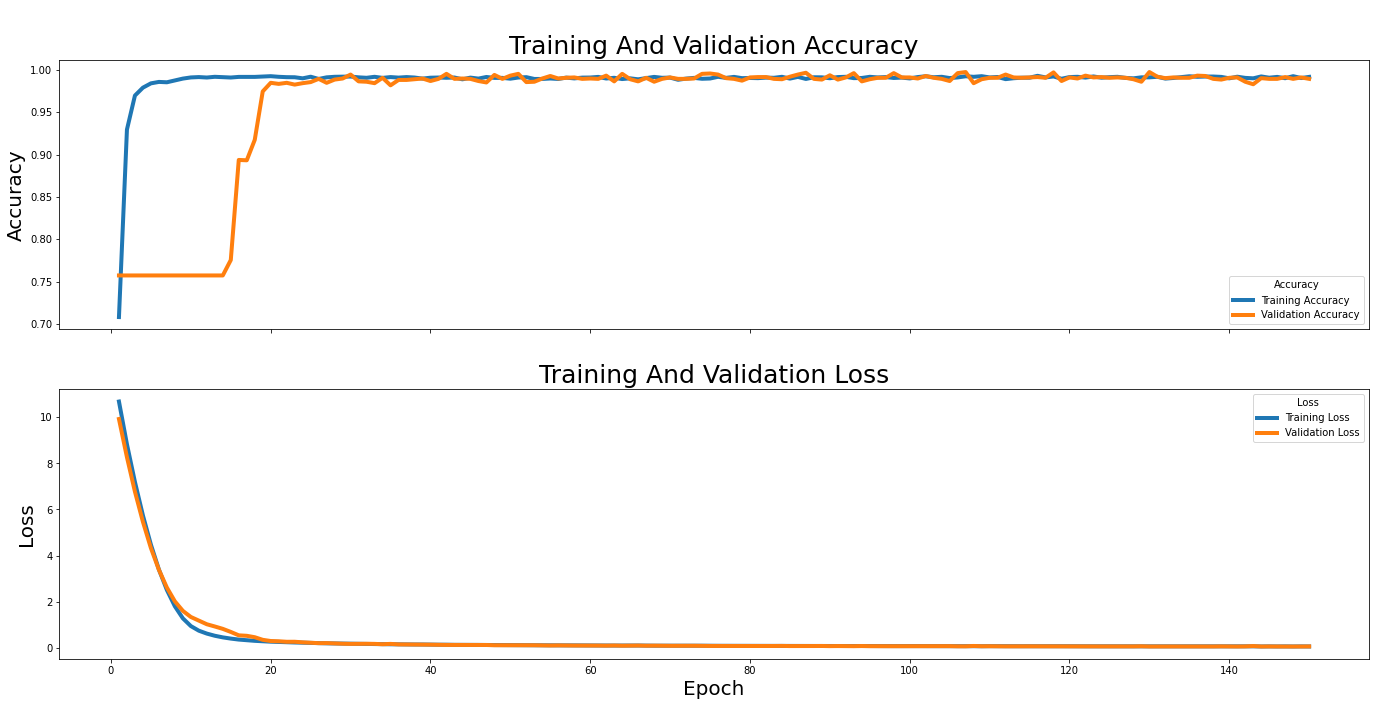

In [ ]:
performance = pd.DataFrame(history.history)
performance["Epoch"] = range(1,len(history.history["accuracy"])+1)    # number of epochs
performance.rename(columns={"loss": "Training Loss","accuracy": "Training Accuracy","val_loss":"Validation Loss","val_accuracy":"Validation Accuracy"}, inplace = True)


print(f"Let's have a look on the performance of neural network architecture :")
_, axs = plt.subplots(2,1,figsize=(20,10), sharex=True)
plt.tight_layout(pad=5.0)

sns.lineplot(data=performance,x="Epoch",y="Training Accuracy",ax=axs[0],alpha=1,linewidth=4)
sns.lineplot(data=performance,x="Epoch",y="Validation Accuracy",ax=axs[0],alpha=1,linewidth=4)
axs[0].set_title("\nTraining And Validation Accuracy",fontsize=25)
axs[0].set_ylabel("Accuracy",fontsize=20)
axs[0].set_xlabel("Epoch",fontsize=20)
axs[0].legend(["Training Accuracy","Validation Accuracy"],title="Accuracy")

sns.lineplot(data=performance,x="Epoch",y="Training Loss",ax=axs[1],alpha=1,linewidth=4)
sns.lineplot(data=performance,x="Epoch",y="Validation Loss",ax=axs[1],alpha=1,linewidth=4)
axs[1].set_title("\nTraining And Validation Loss",fontsize=25)
axs[1].set_ylabel("Loss",fontsize=20)
axs[1].set_xlabel("Epoch",fontsize=20)
axs[1].legend(["Training Loss","Validation Loss"],title="Loss")

plt.show()

#**As you saw all models work perfect and results are acceptable** 🥂